In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import seaborn as sns
import glob

metric=beams gan train, values=[120.7177592   92.84422927  99.67646941 104.65679408  60.21224382
  53.56732141  46.66764859  48.69015884  50.24180988  46.49557125
  46.32252212  40.11737047  47.85444409  37.60689356  38.27596119
  34.76721031  36.49447262  36.93751453  32.86069474  33.79873028] min=32.86069473737991


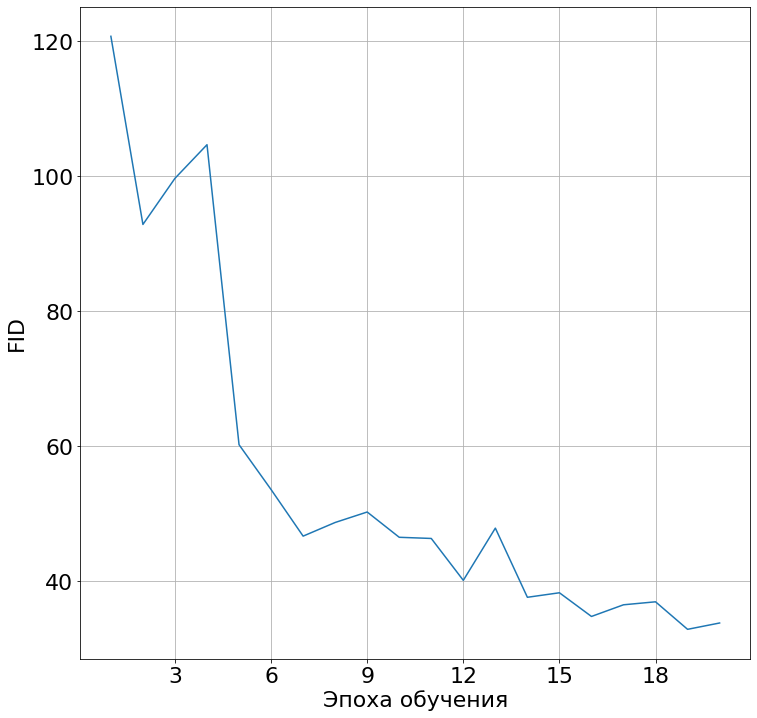

In [8]:
fig = plt.figure(figsize=(12, 12))
plt.rcParams.update({'font.size': 22})

loaded_metrics = np.load('results/beams_gan_train.npy')
plt.plot(range(1, len(loaded_metrics)+1), loaded_metrics)
print(f'metric={name}, values={loaded_metrics} min={loaded_metrics.min()}')

ax = fig.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Эпоха обучения')
plt.ylabel('FID')
plt.grid(True)

fig.savefig('mean_train_figure.svg')
plt.show()

In [2]:
def get_smoothed_values(data_list, decay=0.99):
    final_values_list = [data_list[0]]
    for elem in data_list[1:]:
        final_values_list.append(
            elem * decay + (1.0 - decay) * final_values_list[-1]
        )
    return final_values_list

In [3]:
gen_loss = np.load('/raid/rustam/danil/beams_test/beams_gan_train/ep_19/gen_loss.npy')
disc_loss = np.load('/raid/rustam/danil/beams_test/beams_gan_train/ep_19/disc_loss.npy')

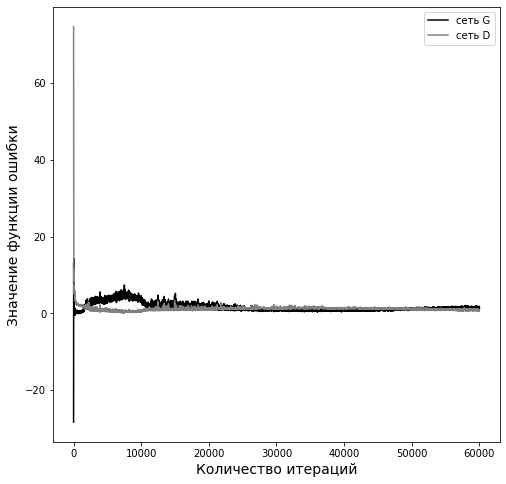

In [4]:
plt.figure(figsize=(8,8))
plt.plot(get_smoothed_values(gen_loss, decay=0.1), color='black')
plt.plot(get_smoothed_values(disc_loss, decay=0.1), color='grey')

plt.xlabel('Количество итераций', fontsize=14)
plt.ylabel('Значение функции ошибки', fontsize=14)

plt.legend(['сеть G', 'сеть D'])
plt.show()

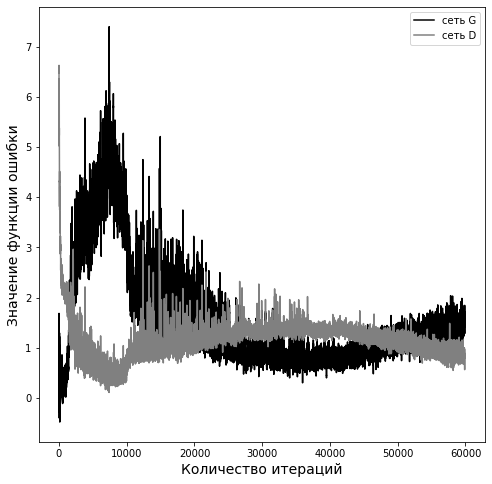

In [9]:
fig = plt.figure(figsize=(8,8))
plt.plot(get_smoothed_values(gen_loss, decay=0.1)[100:], color='black')
plt.plot(get_smoothed_values(disc_loss, decay=0.1)[100:], color='grey')

plt.xlabel('Количество итераций', fontsize=14)
plt.ylabel('Значение функции ошибки', fontsize=14)

plt.legend(['сеть G', 'сеть D'])
plt.show()
fig.savefig('results_loss.svg')